In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [28]:
df = pd.read_csv("Mental health.csv")
df.drop(columns=['id'], inplace=True)
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 17 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 27901 non-null  object 
 1   Age                                    27901 non-null  float64
 2   City                                   27901 non-null  object 
 3   Profession                             27901 non-null  object 
 4   Academic Pressure                      27901 non-null  float64
 5   Work Pressure                          27901 non-null  float64
 6   CGPA                                   27901 non-null  float64
 7   Study Satisfaction                     27901 non-null  float64
 8   Job Satisfaction                       27901 non-null  float64
 9   Sleep Duration                         27901 non-null  object 
 10  Dietary Habits                         27901 non-null  object 
 11  De

,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


In [29]:
df.isnull().sum()#0
df.duplicated().sum()#0

np.int64(0)

In [30]:
#gender to numerical
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Gender"] = le.fit_transform(df["Gender"])




In [31]:
# Exploring 'City' categorical variable
df['City'].value_counts()
import category_encoders as ce


# Target encoding - captures city's relationship with target
encoder = ce.TargetEncoder(cols=['City'])
df['City_encoded'] = encoder.fit_transform(df['City'], df['Depression'])
#df.drop(columns=['City'], inplace=True)


In [32]:
#profession encoding
df['Profession'].value_counts()
df.loc[(df['Profession'] != 'Student') ,'Profession'] = 'Others'
df['Profession'].value_counts()
df["Profession"] = le.fit_transform(df["Profession"])


In [33]:
#Sleep Duration encoding
df["Sleep Duration"].value_counts()
df = df.drop(df[df["Sleep Duration"] == 'Others'].index)
df = pd.get_dummies(df,columns=["Sleep Duration"],dtype=int)

In [34]:
# Dietary Habits encoding
(df['Dietary Habits']).value_counts()
df = df.drop(df[df['Dietary Habits'] == 'Others'].index)
df = pd.get_dummies(df,columns=["Dietary Habits"],dtype=int)


In [35]:
#Degree encoding
df["Degree"].value_counts()
# Apply the education level mapping
degree_mapping = {
    'Class 12': 'High_School',
    'B.Ed': 'Bachelors', 'B.Com': 'Bachelors', 'B.Arch': 'Bachelors',
    'BCA': 'Bachelors', 'B.Tech': 'Bachelors', 'BHM': 'Bachelors',
    'BSc': 'Bachelors', 'B.Pharm': 'Bachelors', 'BBA': 'Bachelors',
    'BA': 'Bachelors', 'BE': 'Bachelors',
    'MSc': 'Masters', 'MCA': 'Masters', 'M.Tech': 'Masters', 'M.Ed': 'Masters',
    'M.Com': 'Masters', 'M.Pharm': 'Masters', 'MA': 'Masters', 'ME': 'Masters',
    'MHM': 'Masters',
    'MBBS': 'Professional', 'MD': 'Professional', 'MBA': 'Professional',
    'LLB': 'Professional', 'LLM': 'Professional', 'PhD': 'Doctoral',
    'Others': 'Other'
}

df['Education_Level'] = df['Degree'].map(degree_mapping)

# Now use get_dummies on the grouped version
df = pd.get_dummies(df, columns=['Education_Level'], prefix='edu',dtype=int)


In [36]:
#Have you ever had suicidal thoughts ? encoding
df["Have you ever had suicidal thoughts ?"].value_counts()
df["Have you ever had suicidal thoughts ?"] = le.fit_transform(df["Have you ever had suicidal thoughts ?"])


In [37]:
#Financial Stress encoding
df["Financial Stress"].value_counts()
df = df.drop(df[df["Financial Stress"] == '?'].index)
df['Financial Stress'] = pd.to_numeric(df['Financial Stress'])

print(f"Missing after conversion: {df['Financial Stress'].isna().sum()}")

Missing after conversion: 0


In [38]:
#Family History of Mental Illness encoding
df["Family History of Mental Illness"].value_counts()
df["Family History of Mental Illness"] = le.fit_transform(df["Family History of Mental Illness"])


In [39]:

#outliers
""" sns.boxplot(x=df['Age'])
plt.show() """

" sns.boxplot(x=df['Age'])\nplt.show() "

In [40]:
#Removing outliers based on Age
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['Age'] >= lower_bound) & (df['Age'] <= upper_bound)]



In [41]:
""" sns.boxplot(x=df['Age'])
plt.show() """
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27856 entries, 0 to 27900
Data columns (total 28 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 27856 non-null  int64  
 1   Age                                    27856 non-null  float64
 2   City                                   27856 non-null  object 
 3   Profession                             27856 non-null  int64  
 4   Academic Pressure                      27856 non-null  float64
 5   Work Pressure                          27856 non-null  float64
 6   CGPA                                   27856 non-null  float64
 7   Study Satisfaction                     27856 non-null  float64
 8   Job Satisfaction                       27856 non-null  float64
 9   Degree                                 27856 non-null  object 
 10  Have you ever had suicidal thoughts ?  27856 non-null  int64  
 11  Work/St

In [42]:
#chi-square test
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

x = df.drop(columns=['Depression','Degree', 'City'])
x_scaled = scaler.fit_transform(x)
y = df['Depression']
chi2_scores = chi2(x_scaled, y)



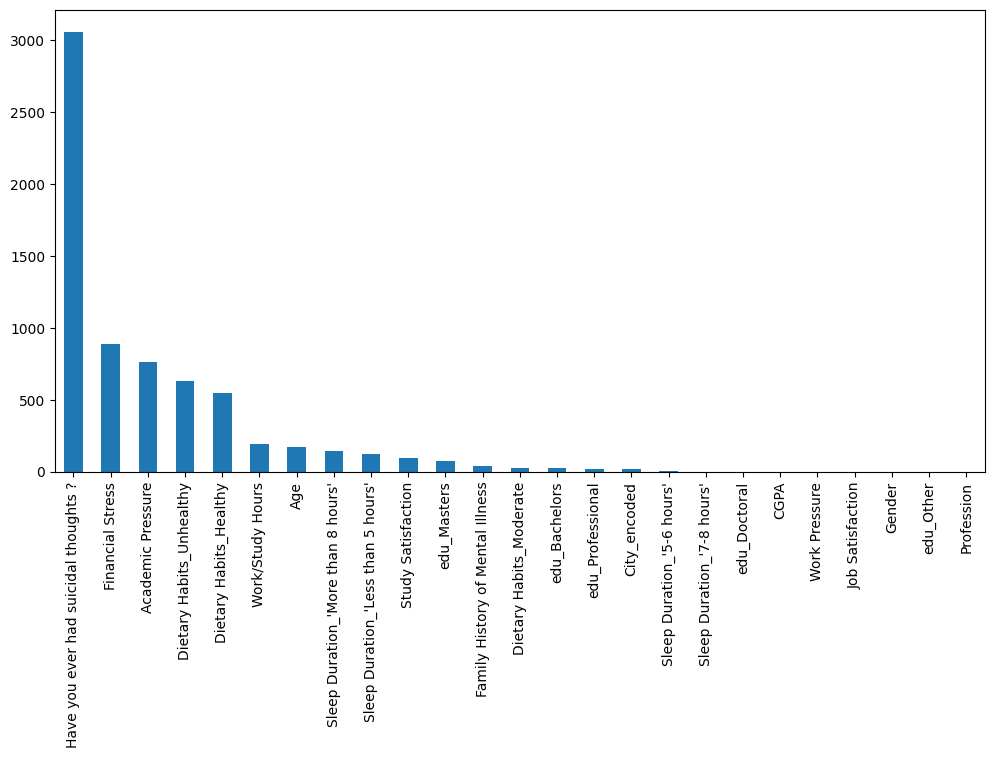

In [43]:
chi_values = pd.Series(chi2_scores[0], index=x.columns)
chi_values.sort_values(ascending=False, inplace=True)
chi_values.plot.bar(figsize=(12,6))
plt.show()

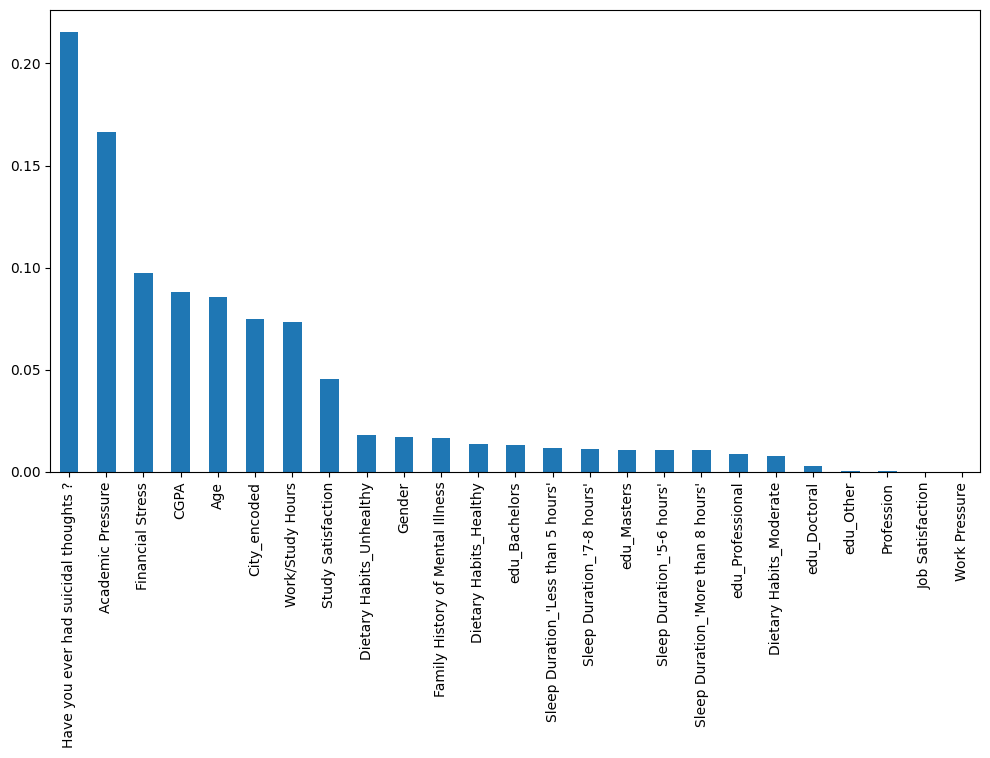

In [44]:
#Feature Selection using Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x, y)
importances = pd.Series(rf.feature_importances_, index=x.columns)
importances.sort_values(ascending=False, inplace=True)
importances.plot.bar(figsize=(12,6))
plt.show()

In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
dt = DecisionTreeClassifier(max_depth=4)
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
train_acc = accuracy_score(y_train, dt.predict(x_train))
test_acc  = accuracy_score(y_test,  dt.predict(x_test))
test_auc  = roc_auc_score(y_test, dt.predict_proba(x_test)[:,1])

print(f"Train Accuracy : {train_acc:.4f}")
print(f"Test Accuracy  : {test_acc:.4f}")
print(f"Test AUC       : {test_auc:.4f}")
print(f"Accuracy       : {accuracy:.4f}")

Train Accuracy : 0.8236
Test Accuracy  : 0.8153
Test AUC       : 0.8798
Accuracy       : 0.8153


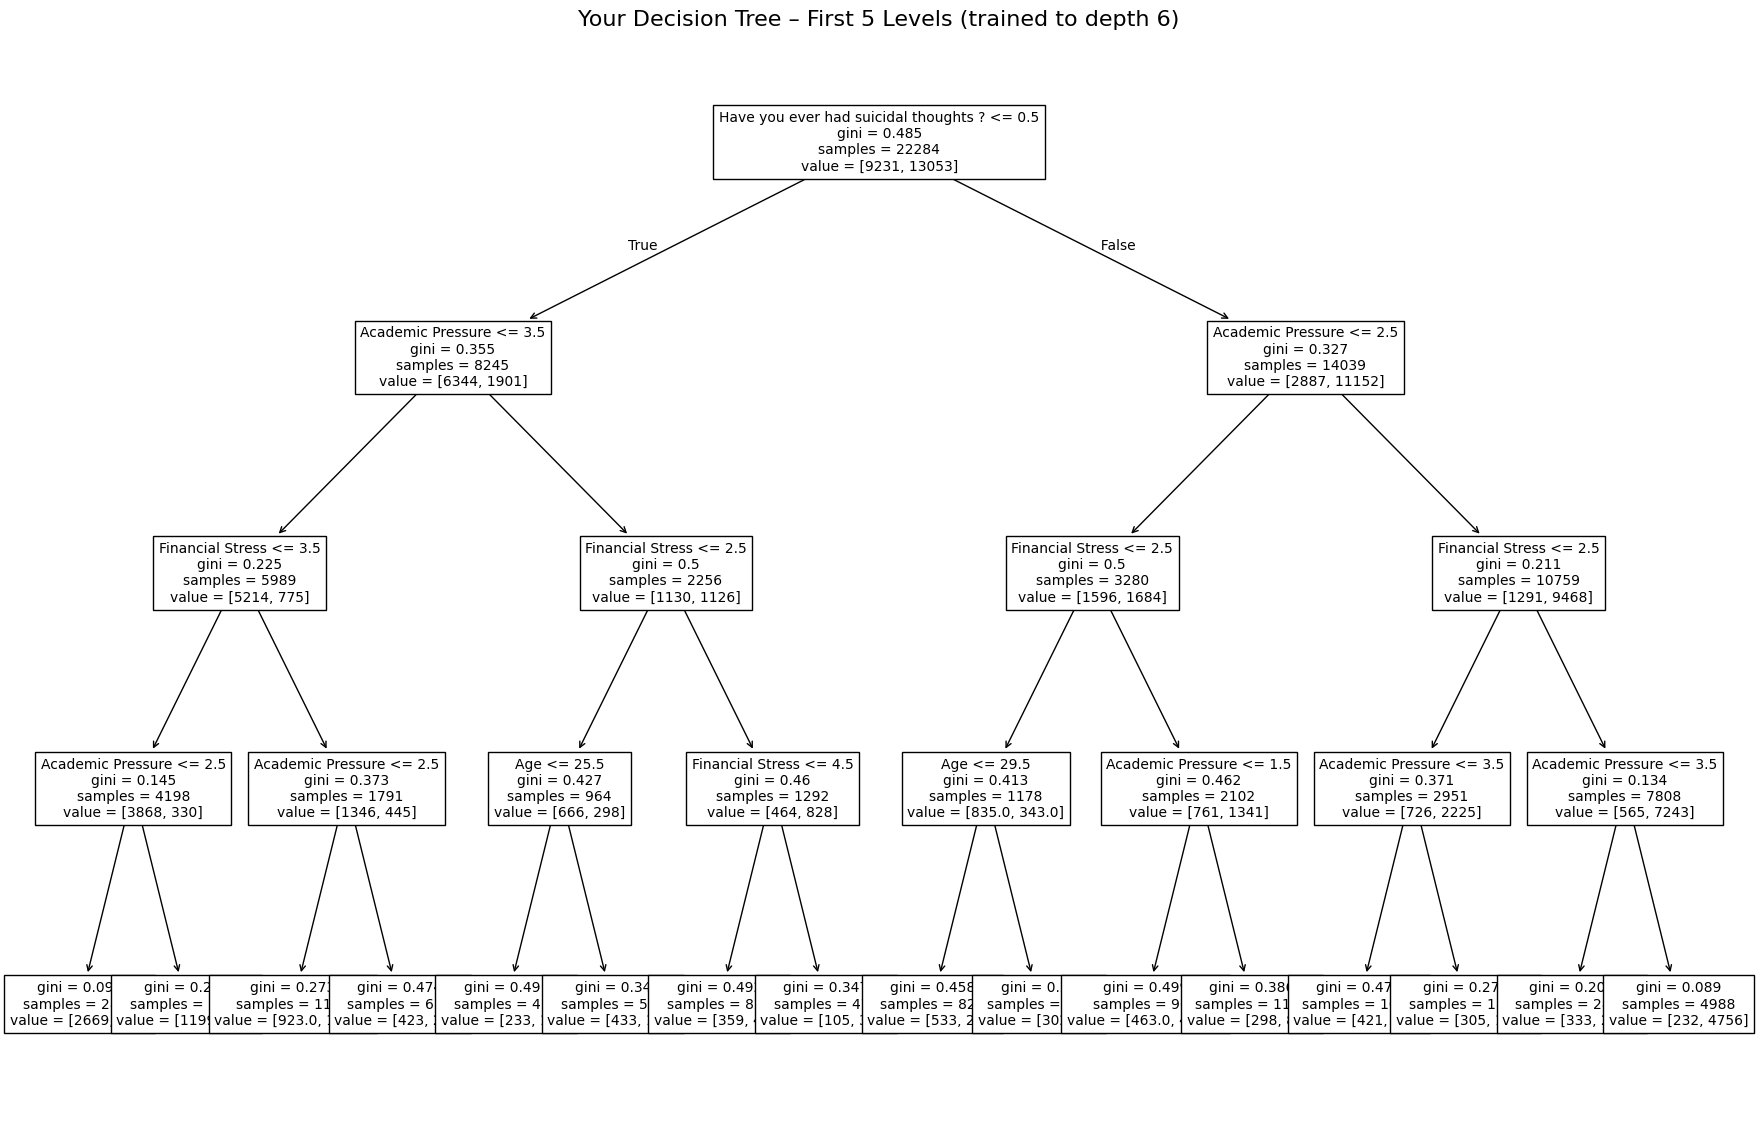

In [46]:
from sklearn.tree import plot_tree

plt.figure(figsize=(22, 14))
plot_tree(
    dt,
    fontsize=10,
    feature_names=x.columns,
    max_depth=4  # ← show only top 4 levels so it fits nicely
)
plt.title("Your Decision Tree – First 5 Levels (trained to depth 6)", fontsize=16)
plt.show()

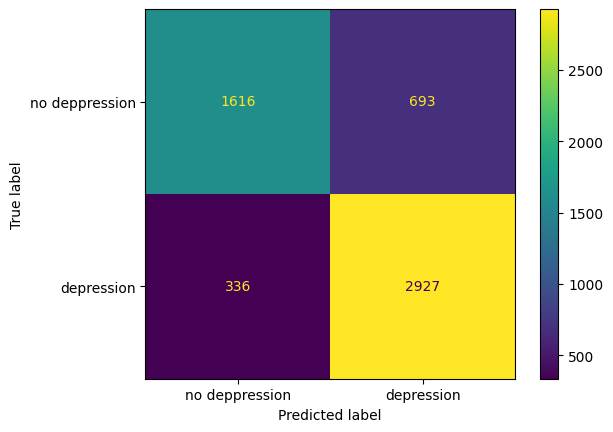

In [47]:
from sklearn import metrics
import numpy as np

actual = y_test
predicted = y_pred
confusion_mtx = metrics.confusion_matrix(actual, predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_mtx, display_labels = ['no deppression', 'depression'])
cm_display.plot()
plt.show()

In [48]:
#Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

clt = GaussianNB()
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=.2,random_state=42)

clt.fit(X_train,y_train)
y_pred = clt.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.87      0.79      2309
           1       0.89      0.75      0.82      3263

    accuracy                           0.80      5572
   macro avg       0.80      0.81      0.80      5572
weighted avg       0.82      0.80      0.81      5572



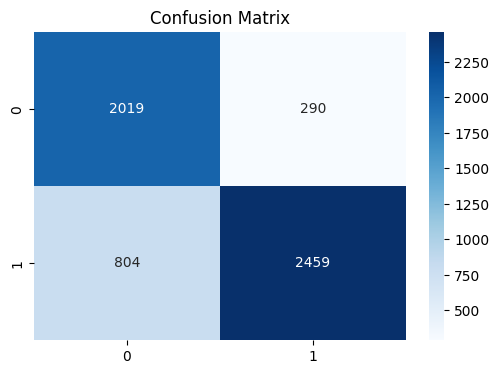

In [49]:
#visualize
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d',cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [50]:
#logistic regression
from sklearn.linear_model import LogisticRegression
Lr = LogisticRegression(max_iter=1000)
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=.2,random_state=42)
Lr.fit(X_train,y_train)
y_pred2 = Lr.predict(X_test)
print(classification_report(y_test,y_pred))



              precision    recall  f1-score   support

           0       0.72      0.87      0.79      2309
           1       0.89      0.75      0.82      3263

    accuracy                           0.80      5572
   macro avg       0.80      0.81      0.80      5572
weighted avg       0.82      0.80      0.81      5572



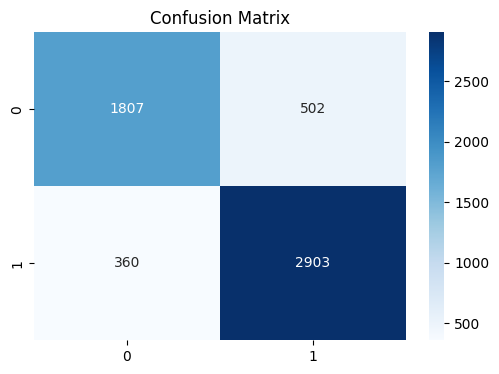

In [51]:
#visualize
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred2)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d',cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [52]:
#xgboost
import xgboost as xgb
xg_cl = xgb.XGBClassifier(eval_metric='logloss')
xg_cl.fit(X_train, y_train)
y_pred = xg_cl.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.77      0.79      2309
           1       0.85      0.88      0.86      3263

    accuracy                           0.83      5572
   macro avg       0.83      0.83      0.83      5572
weighted avg       0.83      0.83      0.83      5572



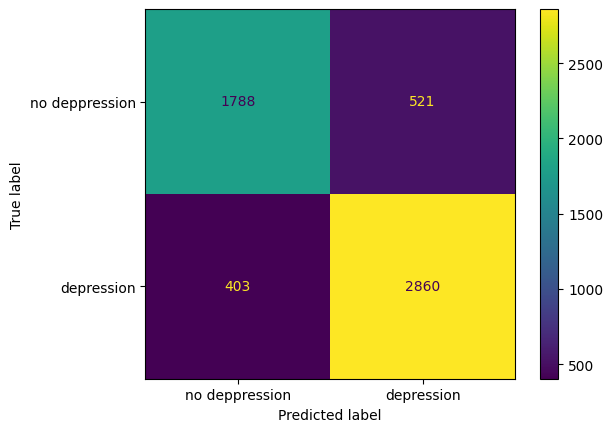

In [53]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
actual = y_test
predicted = y_pred
confusion_mtx = confusion_matrix(actual, predicted)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_mtx, display_labels = ['no deppression', 'depression'])
cm_display.plot()
plt.show()